In [1]:
path_to_fullres_img = "/storage/research/dbmr_luisierlab/database/Ovarian_Visium_GTOP/Visium_HD/HE_high_res_NAB-HUG-14/NAB-HUG-14_HE_Visium3_Scan1.qptiff"

# Read QPTIFF image using OpenSlide
import openslide

# Open the whole slide image
slide = openslide.OpenSlide(path_to_fullres_img)

# Get basic properties
print(f"Image dimensions (level 0): {slide.dimensions}")
print(f"Number of levels: {slide.level_count}")
print(f"Level dimensions: {slide.level_dimensions}")
print(f"Level downsamples: {slide.level_downsamples}")

# Get a thumbnail for quick visualization
thumbnail = slide.get_thumbnail(slide.dimensions)

# Or read a specific region at full resolution
# region = slide.read_region((x, y), level, (width, height))



Image dimensions (level 0): (19200, 23040)
Number of levels: 4
Level dimensions: ((19200, 23040), (9600, 11520), (4800, 5760), (2400, 2880))
Level downsamples: (1.0, 2.0, 4.0, 8.0)


In [2]:
# Get the slide resolution
print("All properties:")
for key in sorted(slide.properties.keys()):
    if 'resolution' in key.lower() or 'mpp' in key.lower():
        print(f"{key}: {slide.properties[key]}")

# Get resolution from TIFF properties
y_resolution = float(slide.properties.get('tiff.YResolution', 0))
x_resolution = float(slide.properties.get('tiff.XResolution', 0))

print(f"\nX Resolution: {x_resolution} pixels/cm")
print(f"Y Resolution: {y_resolution} pixels/cm")

# Convert to microns per pixel
# Resolution is in pixels/cm, so we need: cm/pixel * 10000 microns/cm
microns_per_pixel_x = 10000 / x_resolution if x_resolution > 0 else None
microns_per_pixel_y = 10000 / y_resolution if y_resolution > 0 else None

print(f"\nMicrons per pixel (X): {microns_per_pixel_x:.4f} µm/pixel")
print(f"Microns per pixel (Y): {microns_per_pixel_y:.4f} µm/pixel")

All properties:
tiff.ResolutionUnit: centimeter
tiff.XResolution: 40126.380797114987
tiff.YResolution: 40126.380797114987

X Resolution: 40126.38079711499 pixels/cm
Y Resolution: 40126.38079711499 pixels/cm

Microns per pixel (X): 0.2492 µm/pixel
Microns per pixel (Y): 0.2492 µm/pixel


In [3]:
import anndata as ad

In [4]:
emb = ad.read_h5ad("A1_NAB_HUG_14_adata_016um_coding_with_positions.h5ad")

/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
spot_dim = 16 / microns_per_pixel_x

In [6]:
# sub_obs = emb.obs[(emb.obs["pxl_row_in_fullres"] > 7000) & (emb.obs["pxl_row_in_fullres"] < 12500) & (emb.obs["pxl_col_in_fullres"] > 6000) & (emb.obs["pxl_col_in_fullres"] < 14000)]
# sub_emb = emb[sub_obs.index].copy()



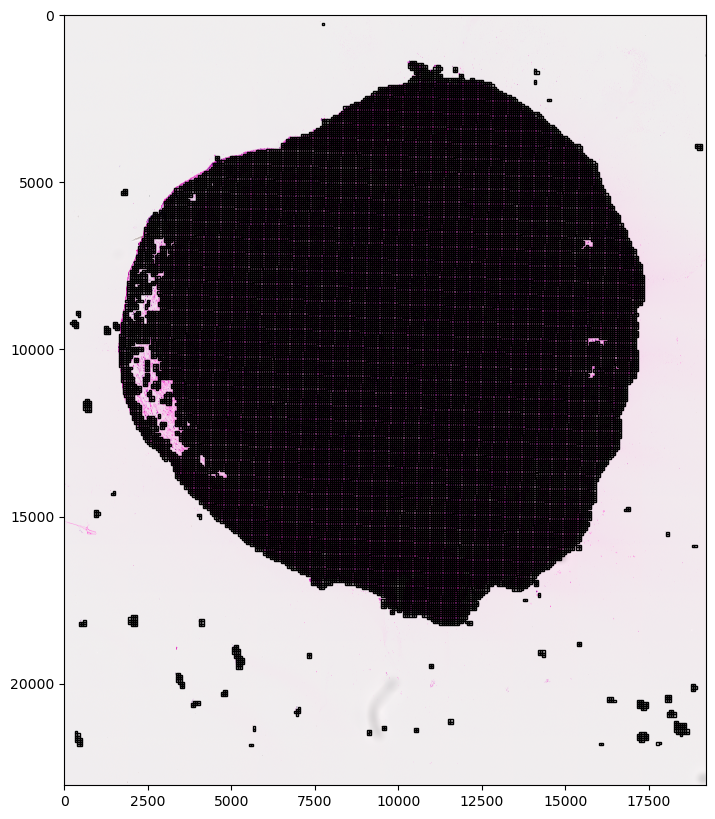

In [9]:
# visualize slide and pixel (8063.679882, 14696.827234)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)
# Add more visualization code as needed
#create a square with coordinates 8063.679882, 14696.827234 and length spot_dim
for idx, row in emb.obs.iterrows():
    x = row['pxl_col_in_fullres']
    y = row['pxl_row_in_fullres']
    rect = plt.Rectangle((x+spot_dim/2, y+spot_dim/2), spot_dim, spot_dim, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
# rect = plt.Rectangle((8063.679882, 14696.827234), spot_dim, spot_dim, edgecolor='black', facecolor='none')
# ax.add_patch(rect)


In [30]:
emb.var_names.get_loc('SPP1')

4684

Text(0.5, 1.0, 'Spots with ACTB detected')

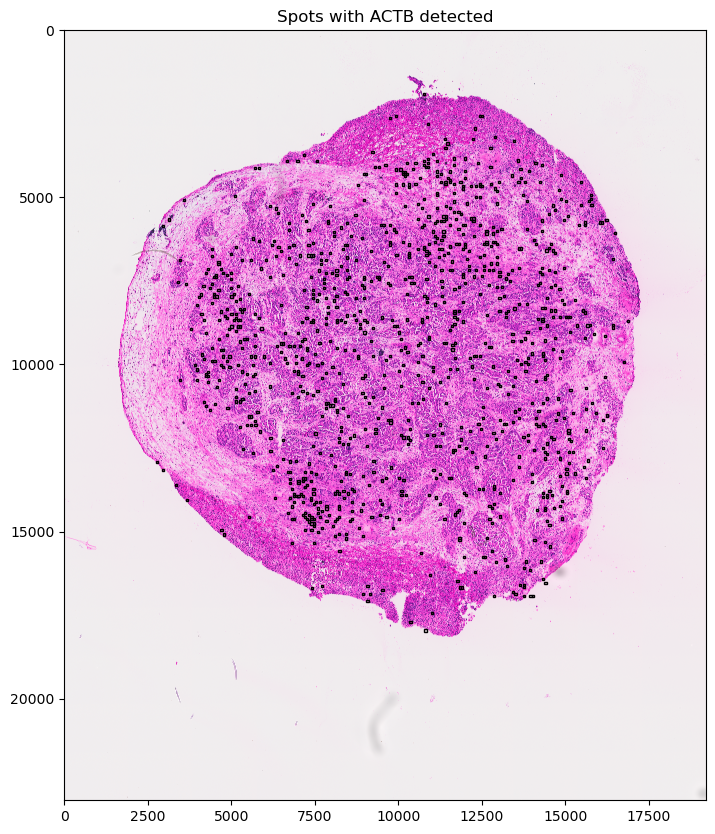

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
# instead of showing thumbnail show a full black image of same dimension
black_image = np.zeros((thumbnail.size[1], thumbnail.size[0], 3), dtype=np.uint8)
ax.imshow(thumbnail)
# Add more visualization code as needed
i = 0
for idx, row in emb.obs.iterrows():
    if emb.X[i, emb.var_names.get_loc('ACTB')] > 1:
        x = row['pxl_col_in_fullres']
        y = row['pxl_row_in_fullres']
        rect = plt.Rectangle((x+spot_dim/2, y+spot_dim/2), spot_dim, spot_dim, edgecolor='black', facecolor='none')
        ax.add_patch(rect)
    i += 1
# rect = plt.Rectangle((8063.679882, 14696.827234), spot_dim, spot_dim, edgecolor='black', facecolor='none')
# ax.add_patch(rect)
plt.title("Spots with ACTB detected")

In [12]:
black_image = np.zeros((thumbnail.size[1], thumbnail.size[0], 3), dtype=np.uint8)


/tmp/ipykernel_108317/3027846051.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.


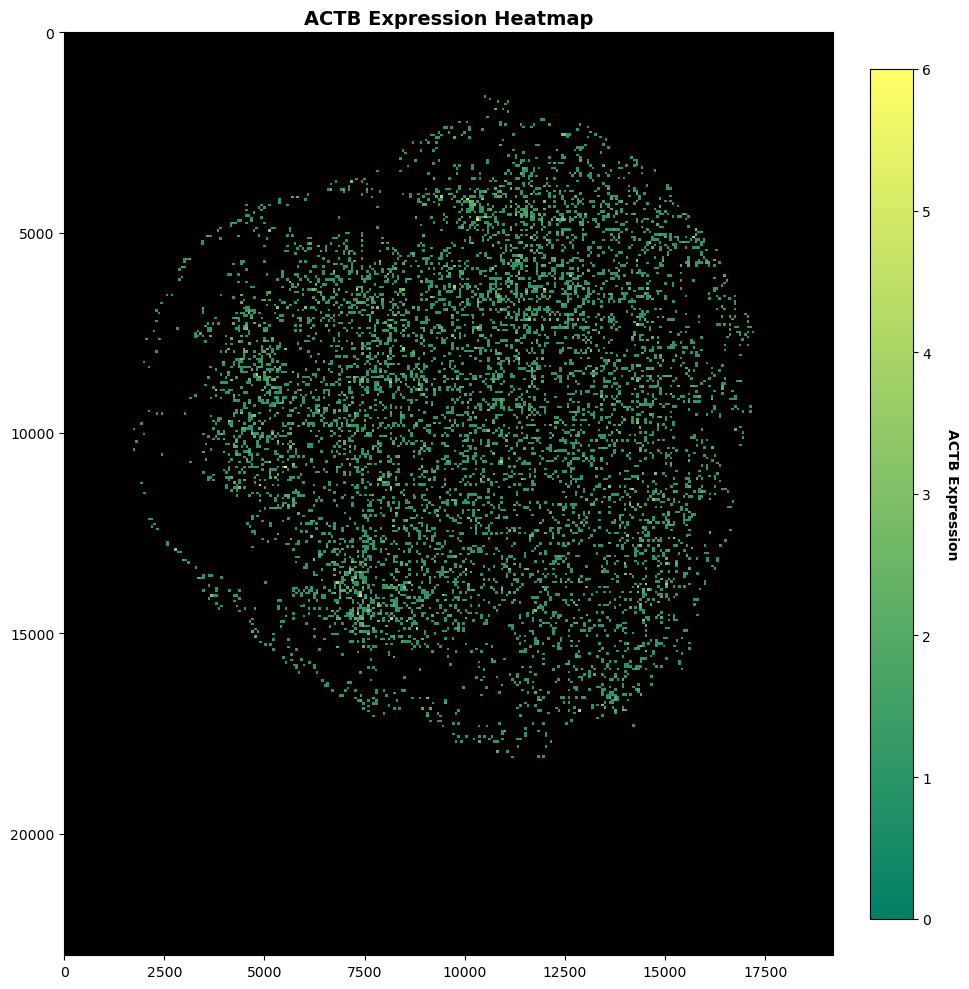

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

# Get ACTB expression values
gene_idx = emb.var_names.get_loc('ACTB')
expression_values = np.array(emb.X[:, gene_idx].todense()).flatten()

# Create colormap normalization
vmin = expression_values.min()
vmax = expression_values.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))

# instead of showing thumbnail show a full black image of same dimension
black_image = np.zeros((thumbnail.size[1], thumbnail.size[0], 3), dtype=np.uint8)
ax.imshow(black_image)
# Plot spots with color representing expression
for i, (idx, row) in enumerate(emb.obs.iterrows()):
    expr_value = expression_values[i]
    if expr_value > 0:  # Only show spots with expression
        x = row['pxl_col_in_fullres']
        y = row['pxl_row_in_fullres']
        color = cmap(norm(expr_value))
        rect = plt.Rectangle((x+spot_dim/2, y+spot_dim/2), spot_dim, spot_dim, 
                            edgecolor='none', facecolor=color, alpha=1)
        ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('ACTB Expression', rotation=270, labelpad=20, fontweight='bold')

plt.title("ACTB Expression Heatmap", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

# Get SPP1 expression values
gene_idx = emb.var_names.get_loc('SPP1')
expression_values = np.array(emb.X[:, gene_idx].todense()).flatten()

# Create colormap normalization
vmin = expression_values.min()
vmax = expression_values.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))

# instead of showing thumbnail show a full black image of same dimension
black_image = np.zeros((thumbnail.size[1], thumbnail.size[0], 3), dtype=np.uint8)
ax.imshow(black_image)
# Plot spots with color representing expression
for i, (idx, row) in enumerate(emb.obs.iterrows()):
    expr_value = expression_values[i]
    if expr_value > 0:  # Only show spots with expression
        x = row['pxl_col_in_fullres']
        y = row['pxl_row_in_fullres']
        color = cmap(norm(expr_value))
        rect = plt.Rectangle((x+spot_dim/2, y+spot_dim/2), spot_dim, spot_dim, 
                            edgecolor='none', facecolor=color, alpha=1)
        ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('SPP1 Expression', rotation=270, labelpad=20, fontweight='bold')

plt.title("SPP1 Expression Heatmap", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3394238/2800113154.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.


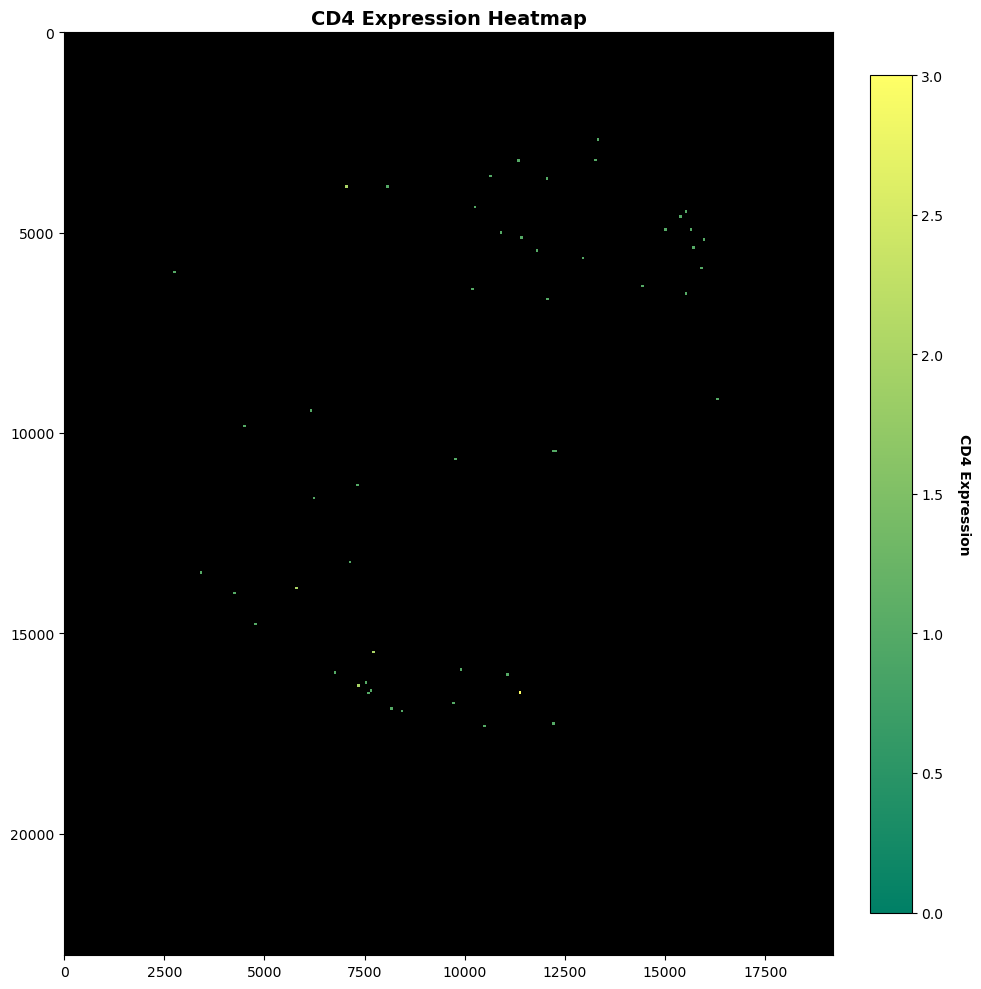

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

# Get CD4 expression values
gene_idx = emb.var_names.get_loc('CD4')
expression_values = np.array(emb.X[:, gene_idx].todense()).flatten()

# Create colormap normalization
vmin = expression_values.min()
vmax = expression_values.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(black_image)

# Plot spots with color representing expression
for i, (idx, row) in enumerate(emb.obs.iterrows()):
    expr_value = expression_values[i]
    if expr_value > 0:  # Only show spots with expression
        x = row['pxl_col_in_fullres']
        y = row['pxl_row_in_fullres']
        color = cmap(norm(expr_value))
        rect = plt.Rectangle((x+spot_dim/2, y+spot_dim/2), spot_dim, spot_dim, 
                            edgecolor='none', facecolor=color, alpha=1)
        ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('CD4 Expression', rotation=270, labelpad=20, fontweight='bold')

plt.title("CD4 Expression Heatmap", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_108317/3424922840.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.


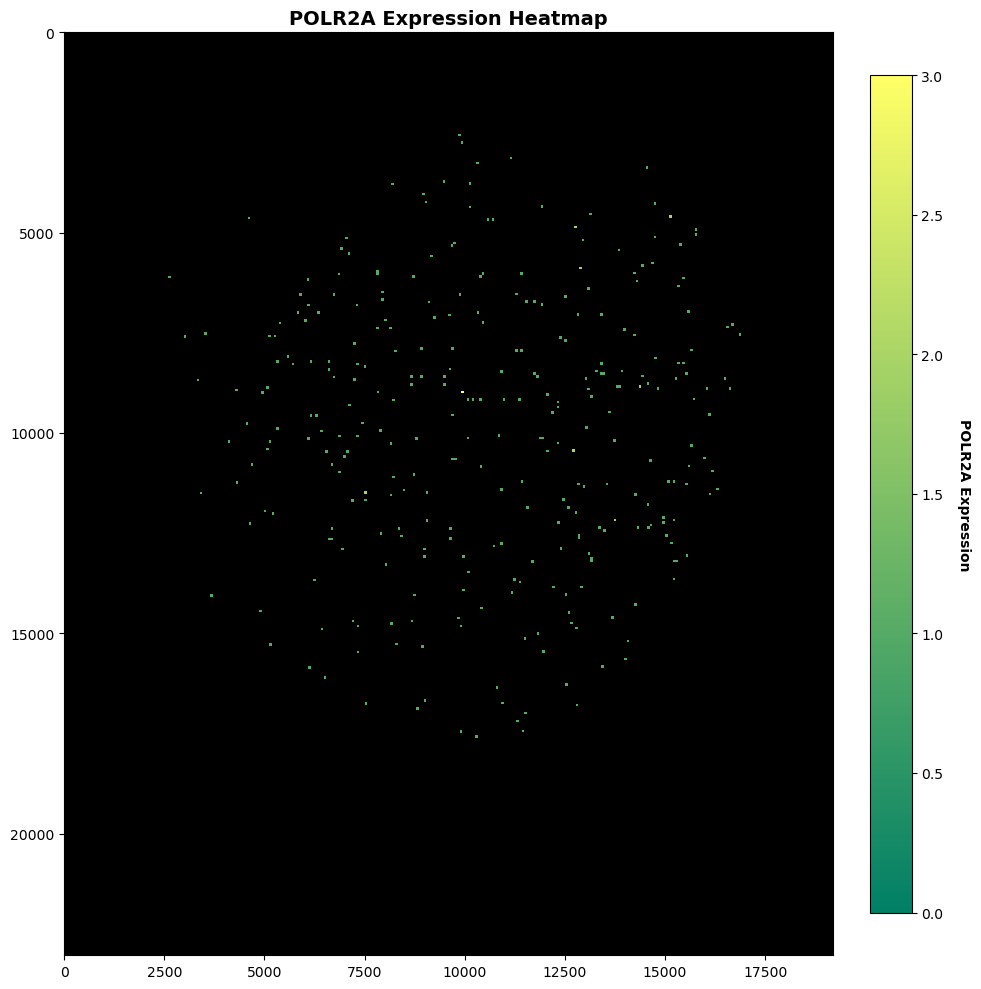

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

# Get POLR2A expression values
gene_idx = emb.var_names.get_loc('POLR2A')
expression_values = np.array(emb.X[:, gene_idx].todense()).flatten()

# Create colormap normalization
vmin = expression_values.min()
vmax = expression_values.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(black_image)

# Plot spots with color representing expression
for i, (idx, row) in enumerate(emb.obs.iterrows()):
    expr_value = expression_values[i]
    if expr_value > 0:  # Only show spots with expression
        x = row['pxl_col_in_fullres']
        y = row['pxl_row_in_fullres']
        color = cmap(norm(expr_value))
        rect = plt.Rectangle((x+spot_dim/2, y+spot_dim/2), spot_dim, spot_dim, 
                            edgecolor='none', facecolor=color, alpha=1)
        ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('POLR2A Expression', rotation=270, labelpad=20, fontweight='bold')

plt.title("POLR2A Expression Heatmap", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [25]:
n_genes_per_spot = emb.obs["n_genes"].values

/tmp/ipykernel_3001559/1727414668.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.


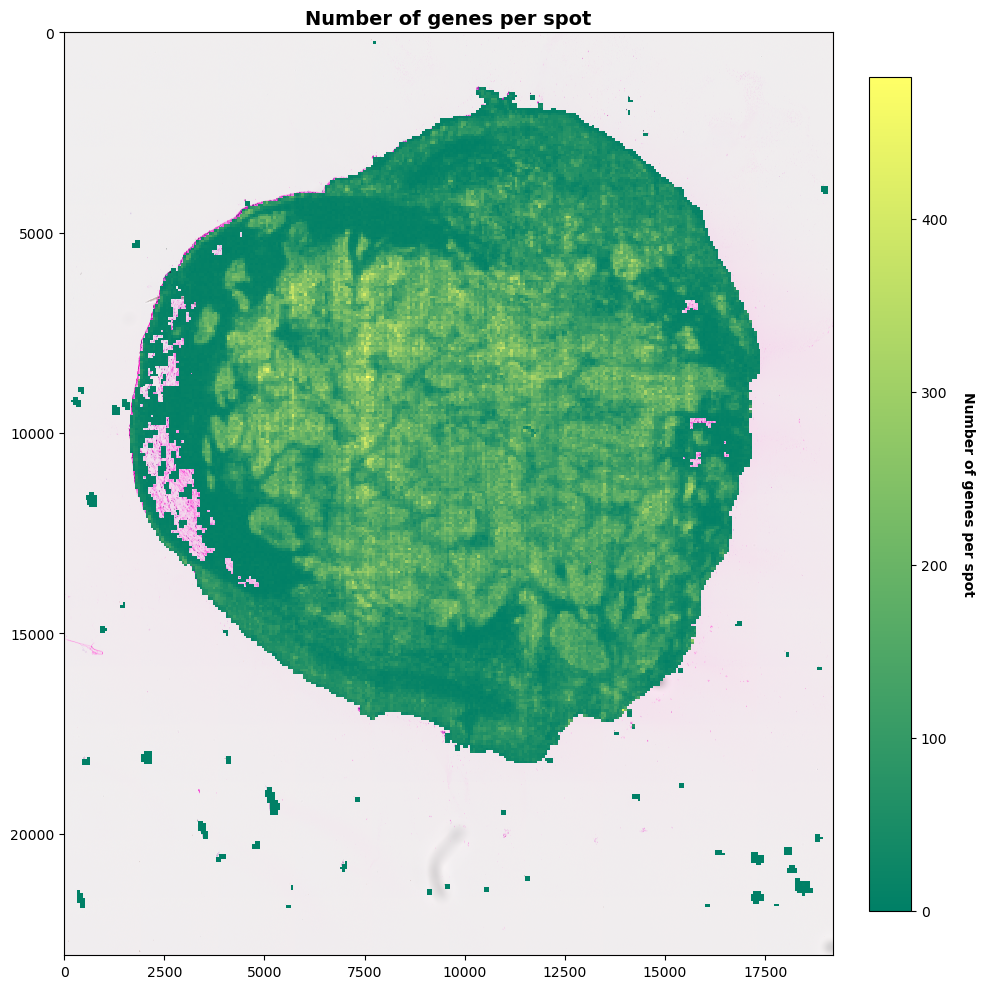

In [28]:

vmin = n_genes_per_spot.min()
vmax = n_genes_per_spot.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

# Plot spots with color representing expression
for i, (idx, row) in enumerate(emb.obs.iterrows()):
    expr_value = n_genes_per_spot[i]
    # if expr_value > 0:  # Only show spots with expression
    x = row['pxl_col_in_fullres']
    y = row['pxl_row_in_fullres']
    color = cmap(norm(expr_value))
    rect = plt.Rectangle((x+spot_dim/2, y+spot_dim/2), spot_dim, spot_dim, 
                        edgecolor='none', facecolor=color, alpha=1)
    ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Number of genes per spot', rotation=270, labelpad=20, fontweight='bold')

plt.title("Number of genes per spot", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3001559/1343448408.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cool')  # You can change to 'plasma', 'inferno', 'magma', etc.


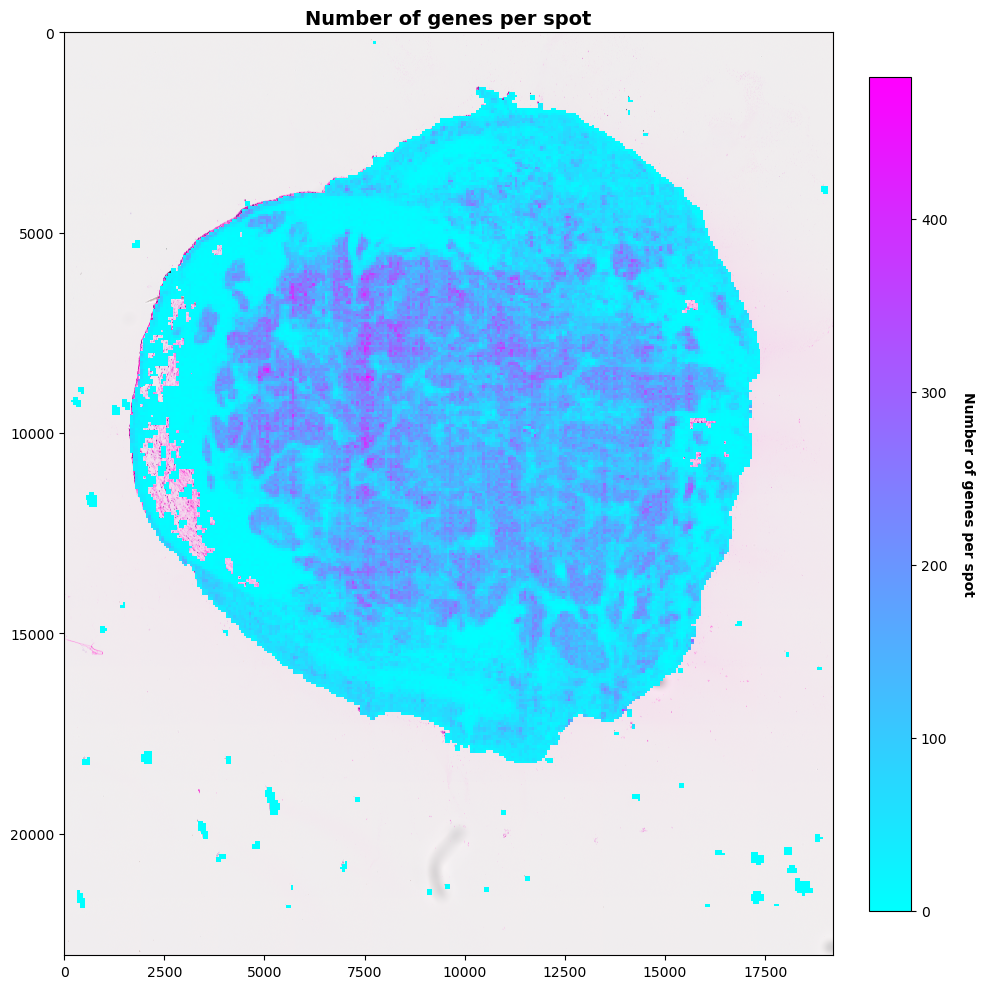

In [29]:

vmin = n_genes_per_spot.min()
vmax = n_genes_per_spot.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('cool')  # You can change to 'plasma', 'inferno', 'magma', etc.

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

# Plot spots with color representing expression
for i, (idx, row) in enumerate(emb.obs.iterrows()):
    expr_value = n_genes_per_spot[i]
    # if expr_value > 0:  # Only show spots with expression
    x = row['pxl_col_in_fullres']
    y = row['pxl_row_in_fullres']
    color = cmap(norm(expr_value))
    rect = plt.Rectangle((x+spot_dim/2, y+spot_dim/2), spot_dim, spot_dim, 
                        edgecolor='none', facecolor=color, alpha=1)
    ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Number of genes per spot', rotation=270, labelpad=20, fontweight='bold')

plt.title("Number of genes per spot", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [26]:
emb.obs

n_genes                barcode  in_tissue  array_row  array_col  \
53007       112  s_016um_00126_00213-1          1        126        213   
49699        49  s_016um_00118_00257-1          1        118        257   
46335        19  s_016um_00110_00245-1          1        110        245   
76815       145  s_016um_00183_00138-1          1        183        138   
51687       180  s_016um_00123_00150-1          1        123        150   
...         ...                    ...        ...        ...        ...   
74054        10  s_016um_00176_00310-1          1        176        310   
74297       147  s_016um_00177_00134-1          1        177        134   
115379      136  s_016um_00275_00154-1          1        275        154   
70219       111  s_016um_00167_00246-1          1        167        246   
101528      290  s_016um_00242_00130-1          1        242        130   

        pxl_row_in_fullres  pxl_col_in_fullres  
53007          8063.679882        14696.827234  
49699          5238.636769        15201.490425  
46335          6007.097541        15717.230810  
76815         12887.546516        11053.986725  
51687         12105.795127        14901.798344  
...                    ...                 ...  
74054          1849.138358        11469.169948  
74297         13143.052083        11439.790307  
115379        11878.823274         5147.450450  
70219          5954.158617        12059.340725  
101528        13412.406097         7269.672545  

[46110 rows x 7 columns]

## Try to create larger spots

In [32]:
# Create larger spots using array_row and array_col
# These represent the grid positions, so we can bin them by 2 to create 2x2 groups
import pandas as pd
import numpy as np

# Get array coordinates
coords = emb.obs[['array_row', 'array_col', 'pxl_row_in_fullres', 'pxl_col_in_fullres']].copy()


# Create large spot grid by binning array coordinates by 2
# This creates 2x2 groups of the original spots
coords['large_grid_row'] = (coords['array_row'] // 2).astype(int)
coords['large_grid_col'] = (coords['array_col'] // 2).astype(int)

# Create unique identifier for each large spot
coords['large_spot_id'] = coords['large_grid_row'].astype(str) + '_' + coords['large_grid_col'].astype(str)


# Check the grouping
print(f"Original number of small spots: {len(coords)}")
print(f"Number of large spots: {coords['large_spot_id'].nunique()}")
print(f"Average small spots per large spot: {len(coords) / coords['large_spot_id'].nunique():.2f}")

# Show distribution of spots per large spot
spots_per_large = coords.groupby('large_spot_id').size()
print(f"\nDistribution of small spots per large spot:")
print(spots_per_large.value_counts().sort_index())

# Sum expression counts for each large spot
from scipy.sparse import csr_matrix

# Get the expression matrix
expr_matrix = emb.X

# Create mapping from original spots to large spots
spot_to_large = coords['large_spot_id'].values

# Create a mapping matrix: rows = large spots, columns = small spots
unique_large_spots = coords['large_spot_id'].unique()
large_spot_to_idx = {spot: idx for idx, spot in enumerate(unique_large_spots)}

# Create index arrays for sparse matrix
small_spot_indices = np.arange(len(coords))
large_spot_indices = np.array([large_spot_to_idx[spot] for spot in spot_to_large])

data = np.ones(len(coords))
aggregation_matrix = csr_matrix((data, (large_spot_indices, small_spot_indices)), 
                                 shape=(len(unique_large_spots), len(coords)))

# Aggregate expression: sum counts from all small spots in each large spot
large_spot_expr = aggregation_matrix @ expr_matrix


print(f"Original expression matrix shape: {expr_matrix.shape}")
print(f"Aggregated expression matrix shape: {large_spot_expr.shape}")


# Create new AnnData object for large spots
large_emb = ad.AnnData(X=large_spot_expr, var=emb.var.copy())



# Calculate center coordinates for large spots
large_spot_coords = coords.groupby('large_spot_id').agg({
    'pxl_row_in_fullres': 'mean',
    'pxl_col_in_fullres': 'mean',
    'large_grid_row': 'first',
    'large_grid_col': 'first',
    'array_row': 'min',  # Keep track of original array coords
    'array_col': 'min'
}).reset_index()

# FIX: Reorder large_spot_coords to match the order of unique_large_spots used in aggregation
large_spot_coords_ordered = large_spot_coords.set_index('large_spot_id').loc[unique_large_spots].reset_index()

# Verify the order now matches
print("Order matches after reordering:", 
      (list(unique_large_spots) == large_spot_coords_ordered['large_spot_id'].tolist()))

# Update large_emb.obs with the correctly ordered coordinates
large_emb.obs = large_spot_coords_ordered.set_index('large_spot_id')
large_emb.obs['n_genes'] = (large_emb.X > 0).sum(axis=1).A1
large_emb.obs['total_counts'] = large_emb.X.sum(axis=1).A1

print("\nCorrected large_emb.obs:")
large_emb.obs.head()

large_emb.obs['n_genes'] = (large_emb.X > 0).sum(axis=1).A1
large_emb.obs['total_counts'] = large_emb.X.sum(axis=1).A1


Original number of small spots: 46110
Number of large spots: 11958
Average small spots per large spot: 3.86

Distribution of small spots per large spot:
1      277
2      346
3      199
4    11136
dtype: int64
Original expression matrix shape: (46110, 19418)
Aggregated expression matrix shape: (11958, 19418)
Order matches after reordering: True


/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")



Corrected large_emb.obs:


/tmp/ipykernel_1316323/3987997682.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


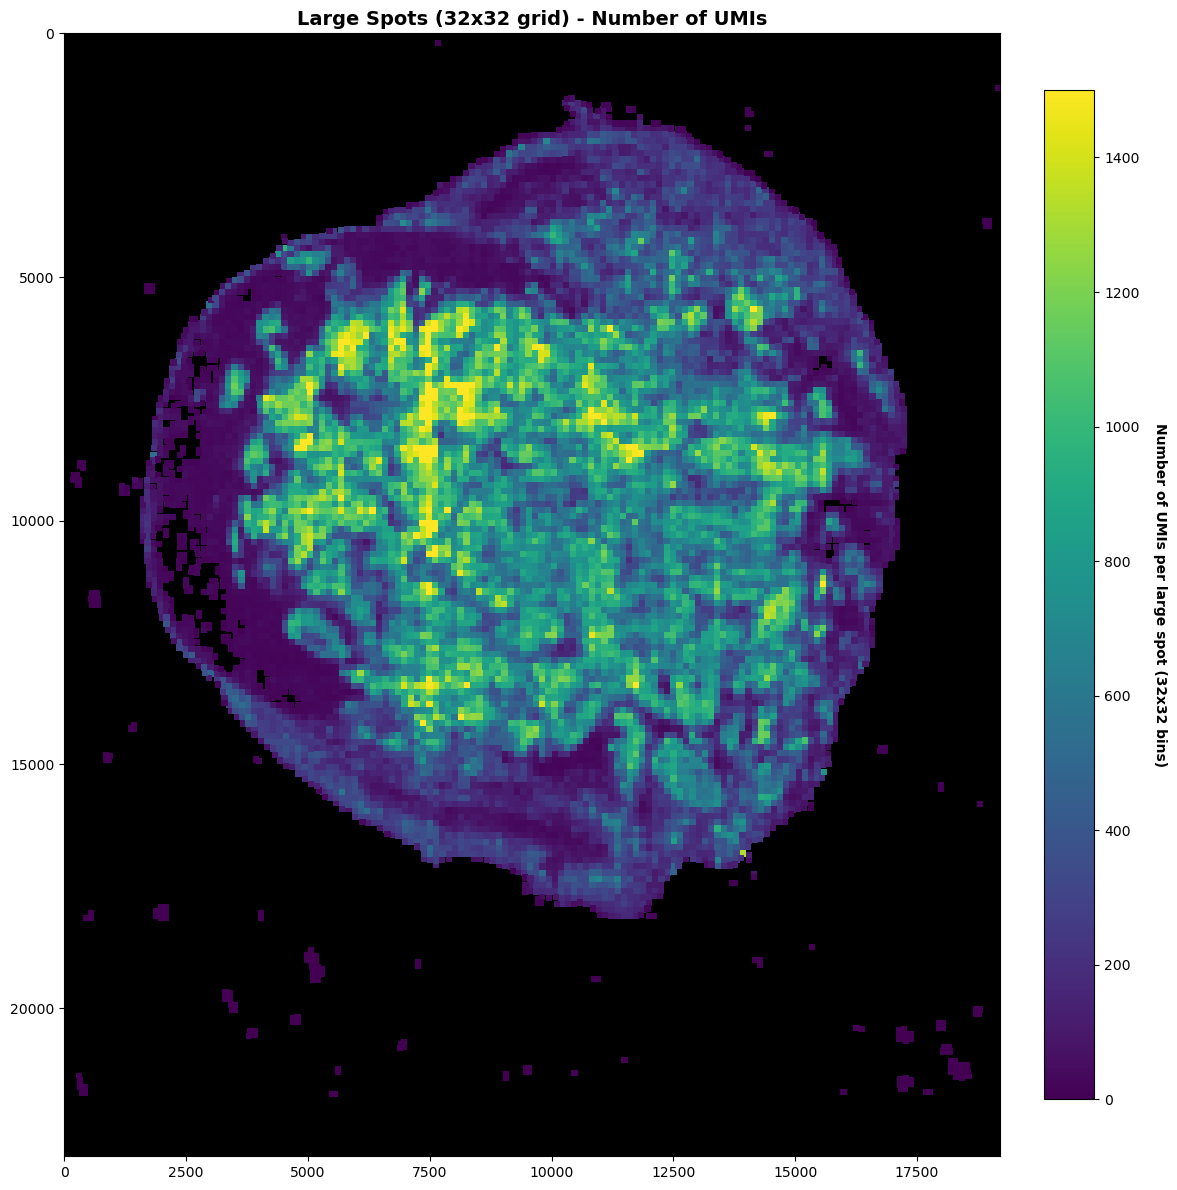


Total large spots plotted: 11958


In [ ]:
# Visualize the large spots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Calculate spot dimension for 128x128 spots (2x the original 64x64)
large_spot_dim = spot_dim * 2

# Get n_genes per large spot
n_genes_large = large_emb.obs['total_counts'].values

# Create colormap normalization
vmin = n_genes_large.min()
vmax = n_genes_large.max()
norm = colors.Normalize(vmin=vmin, vmax=1500)
cmap = cm.get_cmap('viridis')

# Create figure
fig, ax = plt.subplots(figsize=(12, 12))
black_image = np.zeros((thumbnail.size[1], thumbnail.size[0], 3), dtype=np.uint8)
ax.imshow(black_image)

# Plot large spots with color representing n_genes
for i, (idx, row) in enumerate(large_emb.obs.iterrows()):
    x = row['pxl_col_in_fullres']
    y = row['pxl_row_in_fullres']
    color = cmap(norm(n_genes_large[i]))
    rect = plt.Rectangle((x - large_spot_dim/2, y - large_spot_dim/2), 
                         large_spot_dim, large_spot_dim,  facecolor=color, alpha=1)
    ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Number of UMIs per large spot (32x32 bins)', rotation=270, labelpad=20, fontweight='bold')

plt.title("Large Spots (32x32 grid) - Number of UMIs", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print(f"\nTotal large spots plotted: {len(large_emb)}")

/tmp/ipykernel_3394238/793025401.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.


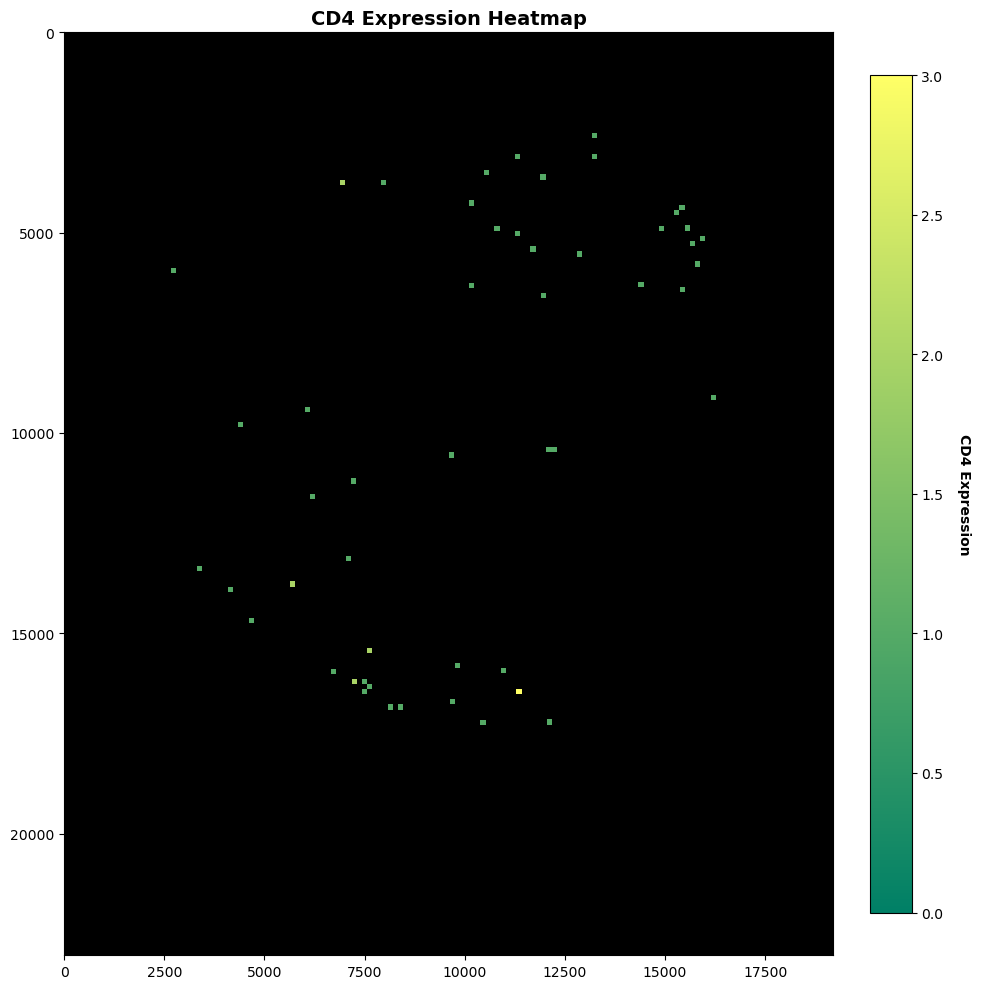

In [149]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

# Get CD4 expression values
gene_idx = large_emb.var_names.get_loc('CD4')
expression_values = np.array(large_emb.X[:, gene_idx].todense()).flatten()

# Create colormap normalization
vmin = expression_values.min()
vmax = expression_values.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(black_image)

# Plot spots with color representing expression
for i, (idx, row) in enumerate(large_emb.obs.iterrows()):
    expr_value = expression_values[i]
    if expr_value > 0:  # Only show spots with expression
        x = row['pxl_col_in_fullres']
        y = row['pxl_row_in_fullres']
        color = cmap(norm(expr_value))
        rect = plt.Rectangle((x-spot_dim, y-spot_dim), spot_dim*2, spot_dim*2, 
                            edgecolor='none', facecolor=color, alpha=1)
        ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('CD4 Expression', rotation=270, labelpad=20, fontweight='bold')

plt.title("CD4 Expression Heatmap", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

AnnData object with n_obs × n_vars = 11958 × 19418
    obs: 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'large_grid_row', 'large_grid_col', 'array_row', 'array_col', 'n_genes', 'UMIs'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [7]:
# Create larger spots using array_row and array_col
# These represent the grid positions, so we can bin them by 2 to create 2x2 groups
import pandas as pd
import numpy as np

# Get array coordinates
coords = emb.obs[['array_row', 'array_col', 'pxl_row_in_fullres', 'pxl_col_in_fullres']].copy()


# Create large spot grid by binning array coordinates by 2
# This creates 2x2 groups of the original spots
coords['large_grid_row'] = (coords['array_row'] // 6).astype(int)
coords['large_grid_col'] = (coords['array_col'] // 6).astype(int)

# Create unique identifier for each large spot
coords['large_spot_id'] = coords['large_grid_row'].astype(str) + '_' + coords['large_grid_col'].astype(str)


# Check the grouping
# print(f"Original number of small spots: {len(coords)}")
# print(f"Number of large spots: {coords['large_spot_id'].nunique()}")
# print(f"Average small spots per large spot: {len(coords) / coords['large_spot_id'].nunique():.2f}")

# Show distribution of spots per large spot
spots_per_large = coords.groupby('large_spot_id').size()
# print(f"\nDistribution of small spots per large spot:")
# print(spots_per_large.value_counts().sort_index())

# Sum expression counts for each large spot
from scipy.sparse import csr_matrix

# Get the expression matrix
expr_matrix = emb.X

# Create mapping from original spots to large spots
spot_to_large = coords['large_spot_id'].values

# Create a mapping matrix: rows = large spots, columns = small spots
unique_large_spots = coords['large_spot_id'].unique()
large_spot_to_idx = {spot: idx for idx, spot in enumerate(unique_large_spots)}

# Create index arrays for sparse matrix
small_spot_indices = np.arange(len(coords))
large_spot_indices = np.array([large_spot_to_idx[spot] for spot in spot_to_large])

data = np.ones(len(coords))
aggregation_matrix = csr_matrix((data, (large_spot_indices, small_spot_indices)), 
                                 shape=(len(unique_large_spots), len(coords)))

# Aggregate expression: sum counts from all small spots in each large spot
large_spot_expr = aggregation_matrix @ expr_matrix


# print(f"Original expression matrix shape: {expr_matrix.shape}")
# print(f"Aggregated expression matrix shape: {large_spot_expr.shape}")


# Create new AnnData object for large spots
emb_96um = ad.AnnData(X=large_spot_expr, var=emb.var.copy())



# Calculate center coordinates for large spots
large_spot_coords = coords.groupby('large_spot_id').agg({
    'pxl_row_in_fullres': 'mean',
    'pxl_col_in_fullres': 'mean',
    'large_grid_row': 'first',
    'large_grid_col': 'first',
    'array_row': 'min',  # Keep track of original array coords
    'array_col': 'min'
}).reset_index()

# FIX: Reorder large_spot_coords to match the order of unique_large_spots used in aggregation
large_spot_coords_ordered = large_spot_coords.set_index('large_spot_id').loc[unique_large_spots].reset_index()

# Verify the order now matches


# Update emb_96um.obs with the correctly ordered coordinates
emb_96um.obs = large_spot_coords_ordered.set_index('large_spot_id')
emb_96um.obs['n_genes'] = (emb_96um.X > 0).sum(axis=1).A1
emb_96um.obs['total_counts'] = emb_96um.X.sum(axis=1).A1



/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
emb_96um

AnnData object with n_obs × n_vars = 1521 × 19418
    obs: 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'large_grid_row', 'large_grid_col', 'array_row', 'array_col', 'n_genes', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [9]:
emb_96um

AnnData object with n_obs × n_vars = 1521 × 19418
    obs: 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'large_grid_row', 'large_grid_col', 'array_row', 'array_col', 'n_genes', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

/tmp/ipykernel_1236983/3664764777.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.


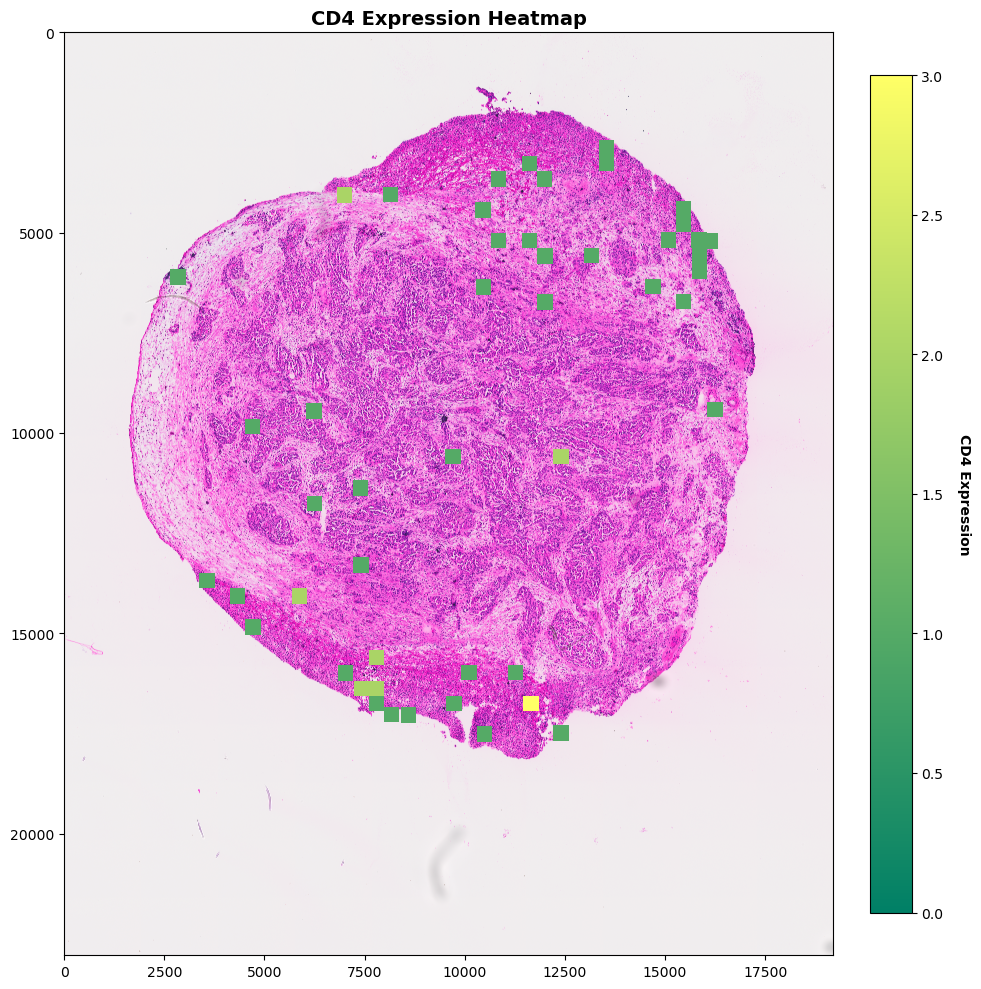

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

# Get CD4 expression values
gene_idx = emb_96um.var_names.get_loc('CD4')
expression_values = np.array(emb_96um.X[:, gene_idx].todense()).flatten()

# Create colormap normalization
vmin = expression_values.min()
vmax = expression_values.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

# Plot spots with color representing expression
for i, (idx, row) in enumerate(emb_96um.obs.iterrows()):
    expr_value = expression_values[i]
    if expr_value > 0:  # Only show spots with expression
        x = row['pxl_col_in_fullres']
        y = row['pxl_row_in_fullres']
        color = cmap(norm(expr_value))
        rect = plt.Rectangle((x-spot_dim/3, y-spot_dim/3), spot_dim*6, spot_dim*6, 
                            edgecolor='none', facecolor=color, alpha=1)
        ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('CD4 Expression', rotation=270, labelpad=20, fontweight='bold')

plt.title("CD4 Expression Heatmap", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1316323/2967173604.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.


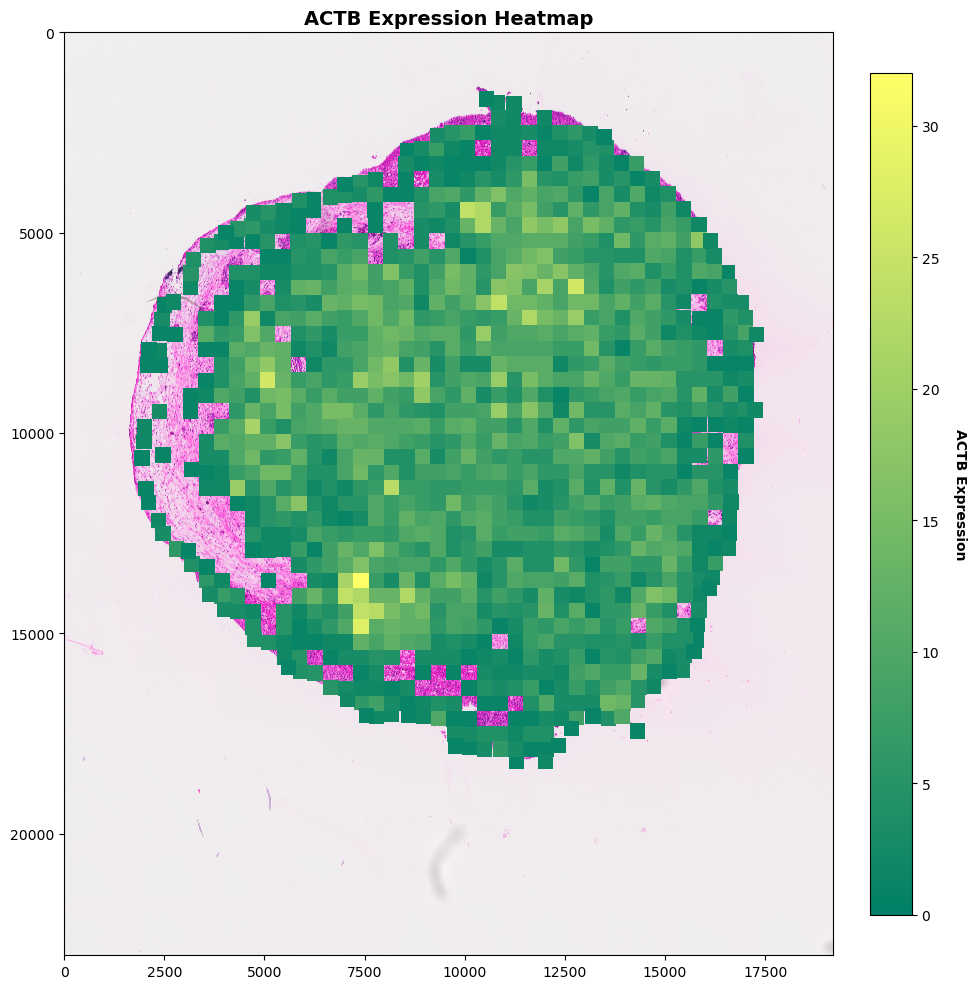

In [ ]:

# Get ACTB expression values
gene_idx = emb_96um.var_names.get_loc('ACTB')
expression_values = np.array(emb_96um.X[:, gene_idx].todense()).flatten()

# Create colormap normalization
vmin = expression_values.min()
vmax = expression_values.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

# Plot spots with color representing expression
for i, (idx, row) in enumerate(emb_96um.obs.iterrows()):
    expr_value = expression_values[i]
    if expr_value > 0:  # Only show spots with expression
        x = row['pxl_col_in_fullres']
        y = row['pxl_row_in_fullres']
        color = cmap(norm(expr_value))
        rect = plt.Rectangle((x-spot_dim/3, y-spot_dim/3), spot_dim*6, spot_dim*6, 
                            edgecolor='none', facecolor=color, alpha=1)
        ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('ACTB Expression', rotation=270, labelpad=20, fontweight='bold')

plt.title("ACTB Expression Heatmap", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1316323/1635396917.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.


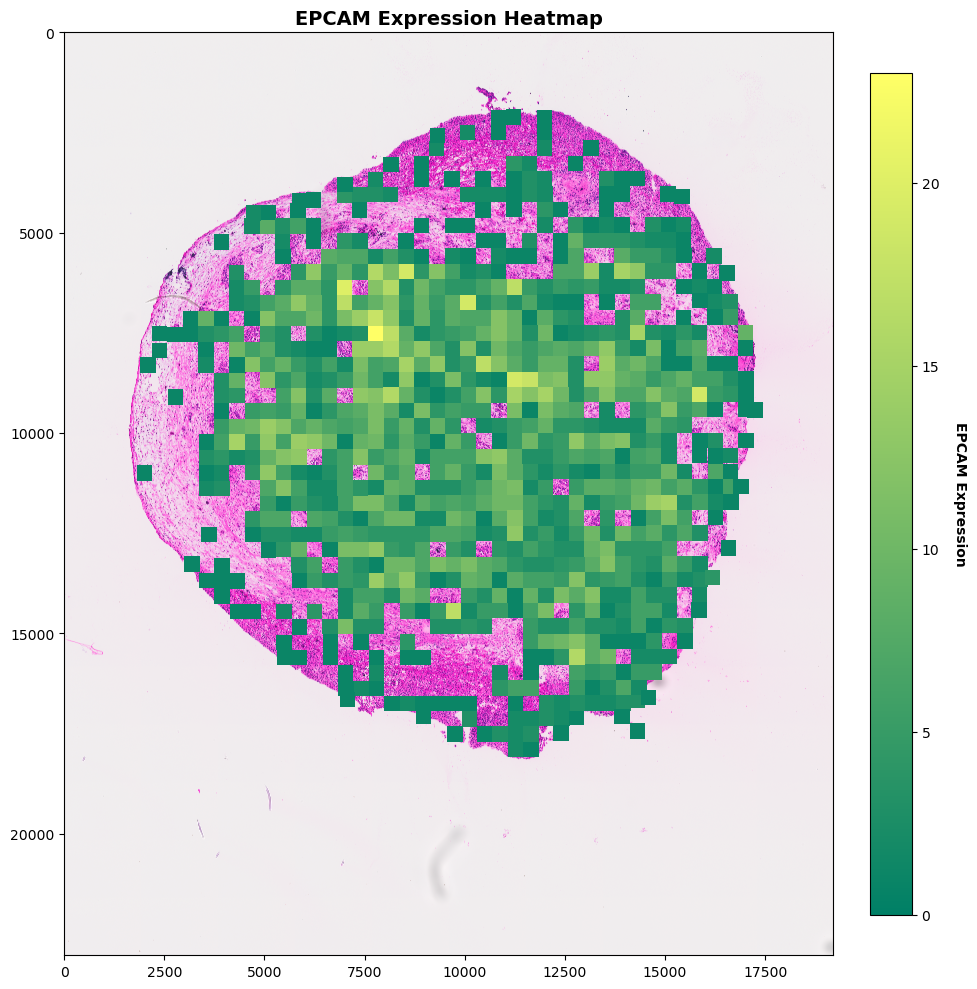

In [ ]:

# Get EPCAM expression values
gene_idx = emb_96um.var_names.get_loc('EPCAM')
expression_values = np.array(emb_96um.X[:, gene_idx].todense()).flatten()

# Create colormap normalization
vmin = expression_values.min()
vmax = expression_values.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('summer')  # You can change to 'plasma', 'inferno', 'magma', etc.

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

# Plot spots with color representing expression
for i, (idx, row) in enumerate(emb_96um.obs.iterrows()):
    expr_value = expression_values[i]
    if expr_value > 0:  # Only show spots with expression
        x = row['pxl_col_in_fullres']
        y = row['pxl_row_in_fullres']
        color = cmap(norm(expr_value))
        rect = plt.Rectangle((x-spot_dim/3, y-spot_dim/3), spot_dim*6, spot_dim*6, 
                            edgecolor='none', facecolor=color, alpha=1)
        ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('EPCAM Expression', rotation=270, labelpad=20, fontweight='bold')

plt.title("EPCAM Expression Heatmap", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [15]:
spot_dim

64.20220927538398

In [24]:
emb_96um.obs

pxl_row_in_fullres  pxl_col_in_fullres  large_grid_row  \
large_spot_id                                                           
21_35                 8096.255913        14536.499939              21   
19_42                 5398.765317        15298.241047              19   
18_40                 6167.620806        15685.639830              18   
30_23                12727.026309        11085.577000              30   
20_25                11945.272350        14933.389353              20   
...                           ...                 ...             ...   
69_38                 6836.963404        -3786.806009              69   
65_18                14757.637055        -2543.387801              65   
42_13                16430.251355         6637.290812              42   
39_56                  192.473587         7678.144124              39   
45_46                 4049.439378         5444.184960              45   

               large_grid_col  array_row  array_col  n_genes  total_counts  
large_spot_id                                                               
21_35                      35        126        210     2698        7116.0  
19_42                      42        114        252     1478        2761.0  
18_40                      40        108        240      872        1407.0  
30_23                      23        180        138     2805        8251.0  
20_25                      25        120        150     2907        7718.0  
...                       ...        ...        ...      ...           ...  
69_38                      38        414        233        2           2.0  
65_18                      18        395        109        0           0.0  
42_13                      13        252         83       30          37.0  
39_56                      56        235        336        4           4.0  
45_46                      46        270        276       28          39.0  

[1521 rows x 8 columns]

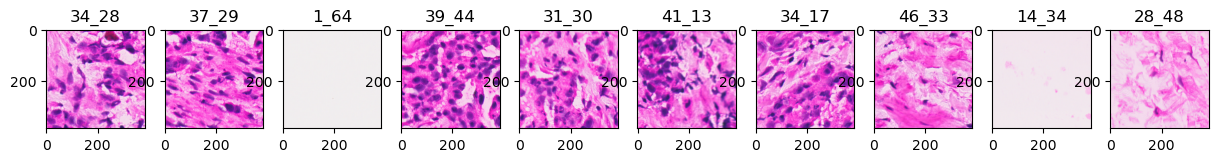

In [30]:
spot_dim_96 = spot_dim * 6
img = np.array(thumbnail)

plt.figure(figsize=(15, 3))
# Plot spots with color representing expression
for i, (idx, row) in enumerate(emb_96um.obs.sample(10).iterrows()):

    plt.subplot(1, 10, i+1)
    x = row['pxl_col_in_fullres']
    y = row['pxl_row_in_fullres']

    # plot the patch

    patch = img[int(x-spot_dim_96/2):int(x+spot_dim_96/2), int(y-spot_dim_96/2):int(y+spot_dim_96/2)]

    plt.imshow(patch)

    plt.title(idx)

# Add colorbar


In [34]:
spots_per_large[spots_per_large > 36*0.95].index

Index(['15_29', '15_30', '15_31', '15_32', '15_33', '15_34', '15_35', '15_36',
       '15_37', '16_26',
       ...
       '51_30', '51_31', '51_32', '51_33', '51_34', '51_35', '51_37', '51_40',
       '52_32', '54_32'],
      dtype='object', name='large_spot_id', length=1145)

In [33]:
spots_per_large

large_spot_id
0_1      3
0_2      1
0_65    13
0_66    15
0_67    25
        ..
8_4      4
9_46     3
9_53     2
9_64     2
9_65     2
Length: 1521, dtype: int64